Step 1: Load the Dataset


In [6]:
import pandas as pd

# Dataset paths
file_paths = [
    "C:/Users/Priyanka/Downloads/DSP/Project Dataset/Project Dataset/Walmart/dataset_walmart-review-5mg.csv",
    "C:/Users/Priyanka/Downloads/DSP/Project Dataset/Project Dataset/Walmart/dataset_walmart-reviews-3mg.csv",
    "C:/Users/Priyanka/Downloads/DSP/Project Dataset/Project Dataset/Walmart/dataset_walmart-reviews-12mg.csv",
    "C:/Users/Priyanka/Downloads/DSP/Project Dataset/Project Dataset/Walmart/dataset_walmart-reviews-10mg.csv",
    "C:/Users/Priyanka/Downloads/DSP/Project Dataset/Project Dataset/Walmart/dataset_walmart-reviews-5mg-part2.csv"
]

# Load each dataset into a list
dataframes = [pd.read_csv(file) for file in file_paths]

# Confirm successful loading
for i, df in enumerate(dataframes):
    print(f"Dataset {i+1} loaded successfully with shape: {df.shape}")


Dataset 1 loaded successfully with shape: (5360, 19)
Dataset 2 loaded successfully with shape: (2904, 18)
Dataset 3 loaded successfully with shape: (3926, 19)
Dataset 4 loaded successfully with shape: (5210, 19)
Dataset 5 loaded successfully with shape: (5371, 19)


Step 2: Check Shapes

In [7]:
# Check the shape of each dataset
for i, df in enumerate(dataframes):
    print(f"Dataset {i+1} shape: {df.shape}")


Dataset 1 shape: (5360, 19)
Dataset 2 shape: (2904, 18)
Dataset 3 shape: (3926, 19)
Dataset 4 shape: (5210, 19)
Dataset 5 shape: (5371, 19)


Step 3: Extract MG Details from the Product Title




In [8]:
import re

# Function to extract MG details
def extract_mg(name):
    match = re.search(r'\b\d+mg\b', str(name).lower())
    return match.group(0) if match else None

# Apply MG extraction to each dataset
for i, df in enumerate(dataframes):
    if 'productName' in df.columns:
        df['mg_details'] = df['productName'].apply(extract_mg)
        print(f"MG details extracted for Dataset {i+1}.")
    else:
        print(f"'productName' column not found in Dataset {i+1}. Skipping MG extraction.")


MG details extracted for Dataset 1.
MG details extracted for Dataset 2.
MG details extracted for Dataset 3.
MG details extracted for Dataset 4.
MG details extracted for Dataset 5.


Step 4: Concatenate the DataFrames

In [9]:
# Concatenate all datasets into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Save combined DataFrame as a CSV
combined_csv_path = "C:/Users/Priyanka/Downloads/DSP/Project Dataset/Project Dataset/Walmart/combined_walmart_reviews.csv"
combined_df.to_csv(combined_csv_path, index=False)

print(f"Combined dataset saved to: {combined_csv_path} with shape: {combined_df.shape}")


Combined dataset saved to: C:/Users/Priyanka/Downloads/DSP/Project Dataset/Project Dataset/Walmart/combined_walmart_reviews.csv with shape: (22771, 20)


Step 5: Analyze and Visualize Variables

Univariate Analysis 

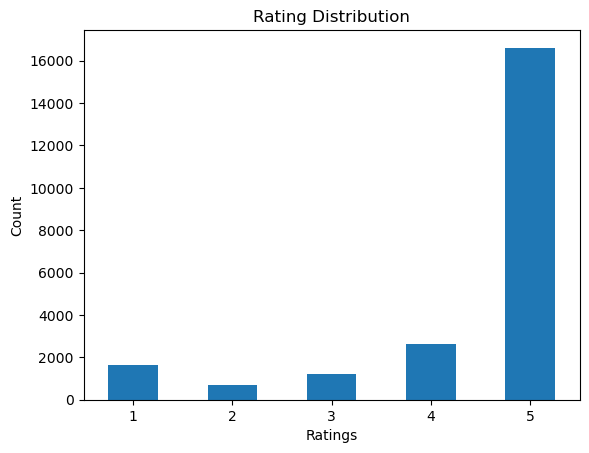

In [10]:
import matplotlib.pyplot as plt

# Check if the 'rating' column exists
if 'rating' in combined_df.columns:
    # Plot distribution of ratings
    combined_df['rating'].value_counts().sort_index().plot(kind='bar', title="Rating Distribution")
    plt.xlabel('Ratings')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()
else:
    print("'rating' column not found.")


Bivariate Analysis Example

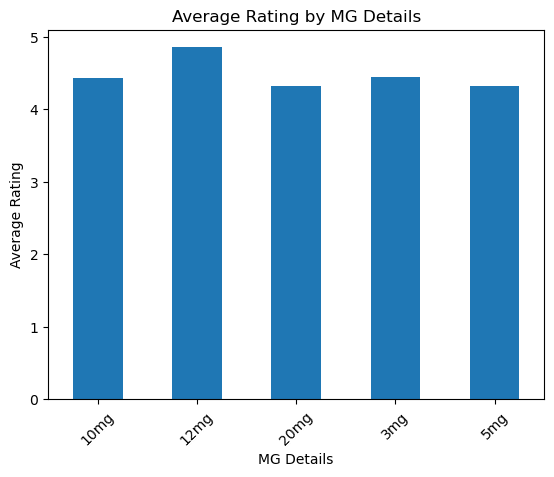

In [11]:
# Check if the required columns exist
if 'rating' in combined_df.columns and 'mg_details' in combined_df.columns:
    # Group by 'mg_details' and calculate average rating
    avg_rating_by_mg = combined_df.groupby('mg_details')['rating'].mean()

    # Plot average ratings for each MG detail
    avg_rating_by_mg.plot(kind='bar', title="Average Rating by MG Details")
    plt.xlabel('MG Details')
    plt.ylabel('Average Rating')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Required columns ('rating' and 'mg_details') not found.")


Step 6: Perform NLP Data Cleaning

In [13]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import nltk

# Step 6: Perform NLP Data Cleaning
print("Starting NLP data cleaning...")

# Download required NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize NLP tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to clean and preprocess text
def preprocess_text(text):
    try:
        text = str(text).lower()  # Convert to lowercase
        text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
        words = text.split()
        words = [word for word in words if word not in stop_words]  # Remove stopwords
        words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatize words
        return ' '.join(words)
    except Exception as e:
        print(f"Error processing text: {text}. Error: {e}")
        return ""

# Check if 'text' column exists
if 'text' in combined_df.columns:
    # Apply preprocessing to 'text' column
    combined_df['cleaned_reviews'] = combined_df['text'].apply(preprocess_text)
    print("Text preprocessing completed successfully.")

    # Save the intermediate cleaned dataset to CSV
    cleaned_csv_path = "C:/Users/Priyanka/Downloads/DSP/Project Dataset/Project Dataset/Walmart/cleaned_walmart_reviews.csv"
    combined_df.to_csv(cleaned_csv_path, index=False)
    print(f"Cleaned dataset saved to: {cleaned_csv_path}")
else:
    print("Error: 'text' column not found in the dataset. Skipping NLP cleaning.")


Starting NLP data cleaning...


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Priyanka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Priyanka\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Text preprocessing completed successfully.
Cleaned dataset saved to: C:/Users/Priyanka/Downloads/DSP/Project Dataset/Project Dataset/Walmart/cleaned_walmart_reviews.csv


Step 7: Check the Frequency of Words

In [14]:
from collections import Counter

# Get top 10 most frequent words from cleaned reviews
if 'cleaned_reviews' in combined_df.columns:
    all_words = ' '.join(combined_df['cleaned_reviews'].dropna())
    word_counts = Counter(all_words.split())
    top_words = word_counts.most_common(10)
    print("Top 10 Words:", top_words)
else:
    print("'cleaned_reviews' column not found.")


Top 10 Words: [('sleep', 12798), ('work', 7814), ('melatonin', 6779), ('night', 6289), ('asleep', 6079), ('help', 6072), ('take', 5119), ('product', 5020), ('great', 4951), ('good', 4458)]


Step 8: Form N-Grams

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# Create bi-grams (2-grams)
if 'cleaned_reviews' in combined_df.columns:
    vectorizer = CountVectorizer(ngram_range=(2, 2))
    ngrams = vectorizer.fit_transform(combined_df['cleaned_reviews'].dropna())
    ngram_counts = vectorizer.get_feature_names_out()
    print("Top 10 Bi-Grams:", ngram_counts[:10])
else:
    print("'cleaned_reviews' column not found.")


Top 10 Bi-Grams: ['00 called' '0022tablet split' '01082020 product' '013tablet accurate'
 '0300 order' '03mg tablet' '03mg unfamiliar' '05 3mg' '05 mg' '0510 card']


Step 9: Form Word Clouds



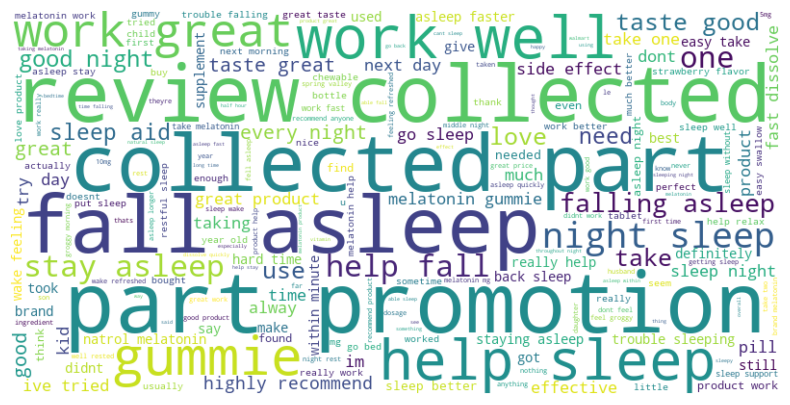

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate and display a word cloud
if 'cleaned_reviews' in combined_df.columns:
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(combined_df['cleaned_reviews'].dropna()))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
else:
    print("'cleaned_reviews' column not found.")


Step 10: Perform Sentiment Analysis

Sentiment analysis completed.
Processed dataset with sentiment saved to: C:/Users/Priyanka/Downloads/DSP/Project Dataset/Project Dataset/Walmart/processed_walmart_reviews.csv


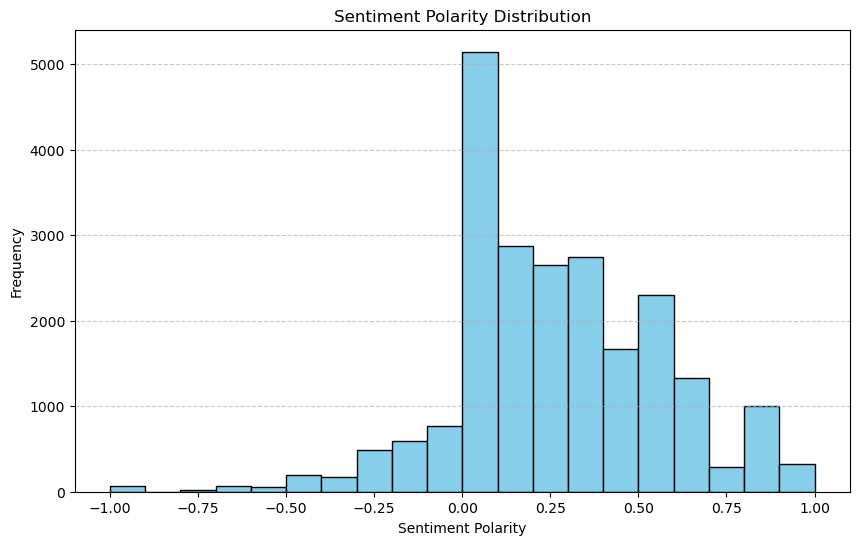

In [18]:
from textblob import TextBlob
import matplotlib.pyplot as plt

# Perform sentiment analysis on cleaned reviews
def sentiment_analysis(text):
    try:
        return TextBlob(text).sentiment.polarity  # Polarity ranges from -1 (negative) to 1 (positive)
    except Exception as e:
        print(f"Error processing text: {e}")
        return None

# Check if 'cleaned_reviews' column exists
if 'cleaned_reviews' in combined_df.columns:
    # Apply sentiment analysis
    combined_df['sentiment'] = combined_df['cleaned_reviews'].apply(sentiment_analysis)
    print("Sentiment analysis completed.")

    # Save the dataset with sentiment analysis
    processed_csv_path = "C:/Users/Priyanka/Downloads/DSP/Project Dataset/Project Dataset/Walmart/processed_walmart_reviews.csv"
    combined_df.to_csv(processed_csv_path, index=False)
    print(f"Processed dataset with sentiment saved to: {processed_csv_path}")

    # Plotting sentiment distribution
    plt.figure(figsize=(10, 6))
    combined_df['sentiment'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', title="Sentiment Polarity Distribution")
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("'cleaned_reviews' column not found. Sentiment analysis could not be performed.")
